In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
%cd "drive/MyDrive/aa/tp7_2"
%pwd

[Errno 2] No such file or directory: 'drive/MyDrive/aa/tp7_2'
/content/drive/MyDrive/aa/tp7_2


'/content/drive/My Drive/aa/tp7_2'

In [158]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import random

Redimensionar os dados de entrada, de modo a os tornar pequenos, é uma importante técnica na área das redes neuronais. Isto evita processos de treino lentos e instáveis, que poderiam resultar quando os valores de entrada são elevados.

In [159]:
mat = np.loadtxt('confirmados.txt') 
scale = np.max(mat, axis=0)
mat = mat / scale 
xs = mat [:,:1]
ys = mat[:,1:]

Para redes mais profundas, devemos usar Rectified Linear Unit (ReLU) como função de ativação das camadas esocndidas.

Vamos construir um modelo com várias camadas com ativação ReLU e no fim uma camada linear.

Otimizador para todos os modelos:

In [160]:
opt = keras.optimizers.SGD(momentum=0.9,learning_rate=0.05)

**Modelo 1:**

*   1 camada escondida (neurónios: 1 ; ativação: relu)
*   1 camada ouput (neurónios: 1 ; ativação: linear)




Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 11/200
10/10 [==============================] - 0s 952us/step - loss: 0.0233
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 13/200
10/10 [===============

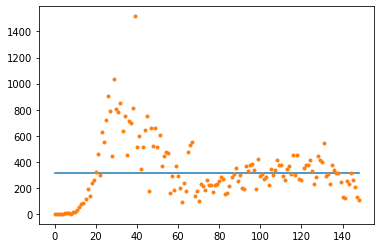

In [161]:
keras.backend.clear_session()
model = keras.Sequential([
  keras.layers.Dense(1,activation='relu'),
  keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

O modelo 1 apesar de apresentar um erro(mse) baixo, podemos observar no gráfico anterior que o modelo não se ajusta muito bem.

Aumentemos o número de camadas escondidas.

**Modelo 2:**

*   2 camadas escondidas (neurónios: 1 ; ativação: relu)
*   1 camada ouput (neurónios: 1 ; ativação: linear)




Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1421
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 13/200
10/10 [=================

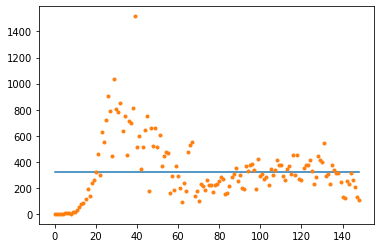

In [162]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(1,activation='relu'),
  keras.layers.Dense(1,activation='relu'),
  keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

Podemos verificar que o erro não diminui de forma significante. Pelo gráfico observamos que o nosso modelo continua a não se ajustar corretamente.

Invés de aumentar o número de camadas, aumentemos o número de neurónios das camadas escondidas.

**Modelo 3:**
*   2 camadas escondidas (neurónios: 2 ; ativação: relu)
*   1 camada ouput (neurónios: 1 ; ativação: linear)




Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0349
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 13/200
10/10 [=================

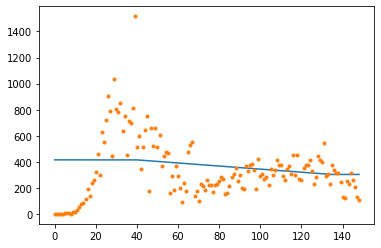

In [163]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(2,activation='relu',name='layer_2'),
  keras.layers.Dense(2,activation='relu',name='layer_3'),
  keras.layers.Dense(1,activation='linear',name='layer_4')
])

model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

Continuamos com, aproximadamente, os mesmo resultados.

Aumentemos outra vez o número de neurónios.

**Modelo 3:**

*   2 camadas escondidas (neurónios: 5 ; ativação: relu)
*   1 camada ouput (neurónios: 1 ; ativação: linear)

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 13/200
10/10 [=================

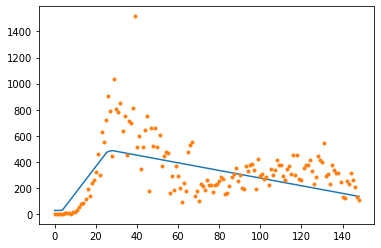

In [166]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(5,activation='relu'),
  keras.layers.Dense(5,activation='relu'),
  keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

Com o aumento para 5 neurónios, nas duas camadas escondidas, verificou-se uma diminuição significativa no erro. 

Ao visualizarmos o ajustamento nota-se que se ajusta muito bem aos dados.

Será que estamos a causar overfitting?
Experimentemos com outros modelos.

**Modelo 4:**

*   3 camadas escondidas (neurónios: 1 ; ativação: relu)
*   1 camada ouput (neurónios: 1 ; ativação: linear)

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0369
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 4/200
10/10 [==============================] - 0s 964us/step - loss: 0.0242
Epoch 5/200
10/10 [==============================] - 0s 929us/step - loss: 0.0227
Epoch 6/200
10/10 [==============================] - 0s 973us/step - loss: 0.0235
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 13/200
10/10 [===========

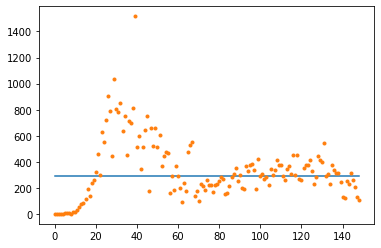

In [168]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(1,activation='relu'),   
  keras.layers.Dense(1,activation='relu'),
  keras.layers.Dense(1,activation='relu'),                        
  keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

A partir de um ponto o aumento das camadas não parece ser significante, ao contrário do número de neurónios.

**Modelo 5:**

*   3 camadas escondidas (neurónios: 7 ; ativação: relu)
*   1 camada ouput (neurónios: 1 ; ativação: linear)


Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 13/200
10/10 [=================

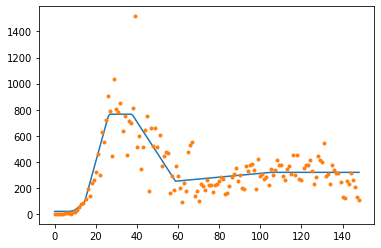

In [173]:
keras.backend.clear_session()

model = keras.Sequential([
  keras.layers.Dense(6,activation='relu'),   
  keras.layers.Dense(6,activation='relu'),
  keras.layers.Dense(6,activation='relu'),                        
  keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

No modelo 5 verificamos um erro muito baixo e um ajustamento muito bom.

A flexibilidade das redes neuronais é um problema pois temos imensos parâmetros a ajustar. 

Uma opção para resolver este problema é experimentar variadas combinações destes parâmetros e verificar o modelo que melhor se ajusta ao nosso conjunto de validação. 

Façamos uma função para construir o modelo de uma forma mais simples, passando apenas por parâmetros o número pretendido de camadas escondidas e neurónios.


In [174]:
def construir_modelo(n_escondidas,n_neuronios):
  keras.backend.clear_session()
  model = keras.models.Sequential()
  for camada in range(n_escondidas):
    model.add(keras.layers.Dense(n_neuronios, activation='relu'))
  model.add(keras.layers.Dense(1,activation='linear'))
  opt = keras.optimizers.SGD(momentum=0.9,learning_rate=0.05)
  model.compile(optimizer=opt,loss='mse')
  return model

Podemos criar valores aleatórios para o número de camadas e para o número de neurónios e verificar qual o melhor modelo.

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 12/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 13/200
10/10 [=================

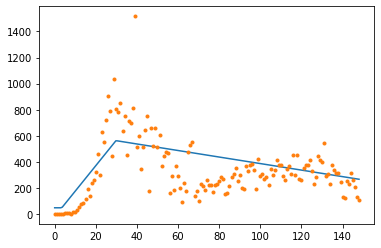

In [191]:
from numpy import random

n_camadas_escondidas = random.randint(9) + 1 # random de 1 a 10
n_neuronios = random.randint(29) + 1 # random de 1 a 30

model = construir_modelo(n_camadas_escondidas,n_neuronios)
model.fit(xs,ys,epochs=200,batch_size=16)

x = np.linspace(0,mat[-1,0],200).reshape((-1,1))
y = model.predict(x)
plt.plot(x*scale[0],y*scale[1])
plt.plot(xs*scale[0],ys*scale[1],'.') 

model.summary()
print('Nº camadas escondidas: ', n_camadas_escondidas)
print('Nº neurónios: ', n_neuronios)